<a href="https://colab.research.google.com/github/Nuradilisayev/Data_science_course_codify/blob/master/HW15_08_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/806447_1382162_bundle_archive.zip

Archive:  /content/806447_1382162_bundle_archive.zip
  inflating: shootings.csv           


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df=pd.read_csv('/content/shootings.csv',parse_dates=['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   float64       
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

In [10]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [25]:
df.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2864,3362,Gregory Kocian,2018-01-28,shot,gun,33.0,M,White,Conroe,TX,False,attack,Car,False,Guns
1865,2176,Jamal Rollins,2016-12-30,shot,gun,21.0,M,Black,Miami,FL,False,other,Car,False,Guns
985,1162,Alan Paul Bartley,2016-01-11,shot,unknown,56.0,M,White,San Fernando,CA,False,attack,Car,False,Unknown


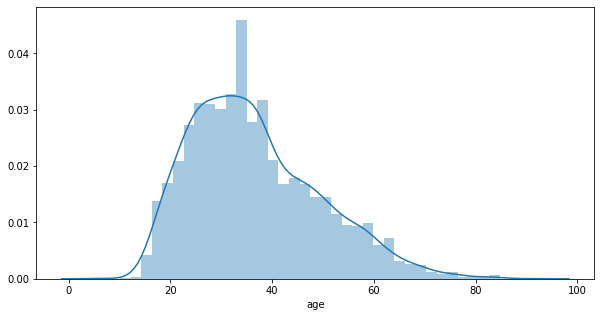

In [30]:
plt.figure(figsize=(10, 5))
sns.distplot(df.age)

In [32]:
df['arms_category'].value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

In [85]:
summ_by_state = df.groupby('state')['state'].count().sort_values(ascending=False)

In [162]:
summ_by_state.head(10)

state
CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
Name: state, dtype: int64

In [94]:
list_of_states = summ_by_state.where(summ_by_state>300).dropna().index.to_list()

In [95]:
list_of_states

['CA', 'TX', 'FL']

In [98]:
df[df['state'].isin(list_of_states)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,White,Stockton,CA,False,attack,Not fleeing,False,Sharp objects
11,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,Black,Freeport,TX,False,attack,Not fleeing,False,Guns
20,325,Andy Martinez,2015-01-09,shot,gun,33.0,M,Hispanic,El Paso,TX,False,attack,Not fleeing,False,Guns
22,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,Hispanic,South Gate,CA,False,attack,Not fleeing,False,Guns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4884,5900,Erik Salgado,2020-06-06,shot,unknown,22.0,M,Hispanic,Oakland,CA,False,undetermined,Not fleeing,False,Unknown
4885,5908,Jarrid Hurst,2020-06-07,shot,knife,35.0,M,White,Industry,CA,True,other,Not fleeing,False,Sharp objects
4886,5911,Lewis Ruffin,2020-06-09,shot,gun,38.0,M,Black,Orlando,FL,False,attack,Other,False,Guns
4888,5914,Mason James Lira,2020-06-11,shot,gun,26.0,M,White,Paso Robles,CA,True,attack,Foot,False,Guns


In [156]:
df_of_states=summ_by_state.to_frame().rename(columns={"state": "amount_of_shootings"}).reset_index(drop=False)

In [163]:
df_of_states.head(5)

,state,amount_of_shootings
0,CA,701
1,TX,426
2,FL,324
3,AZ,222
4,CO,168


In [178]:
df_of_states.amount_of_shootings.mean()

95.98039215686275

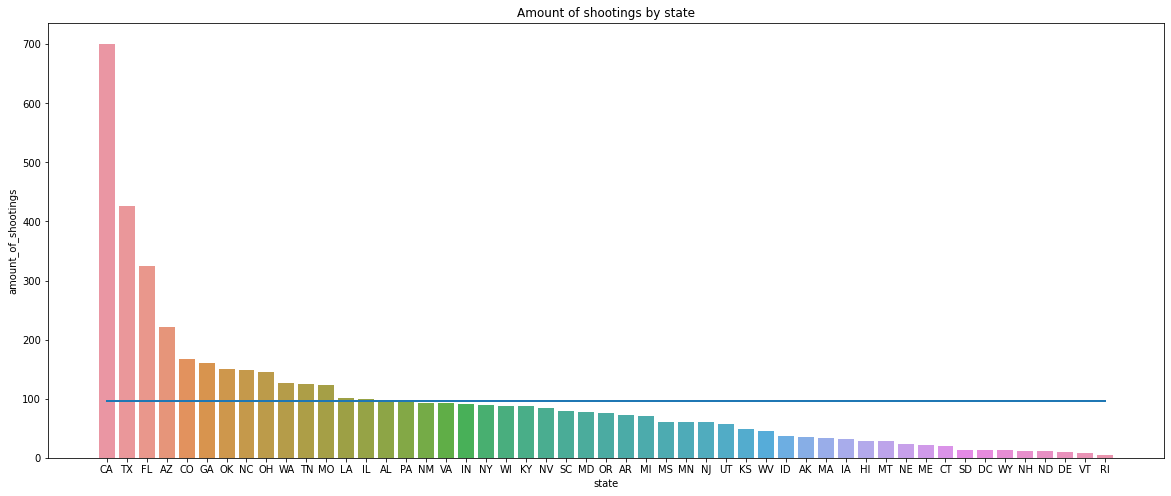

In [180]:
plt.figure(figsize=(20, 8))
plt.title('Amount of shootings by state')
plt.xlabel('States')
plt.ylabel('Amount')
sns.barplot(x='state', y='amount_of_shootings', data=df_of_states )
plt.plot([0,50], [95.98, 95.98], linewidth=2)